In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings("ignore") #Suppresses all warnings

In [7]:
df=pd.read_csv("/content/Priya Chanchal - heart_v2.csv")

In [8]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [9]:
df.shape

(270, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [11]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


<Axes: >

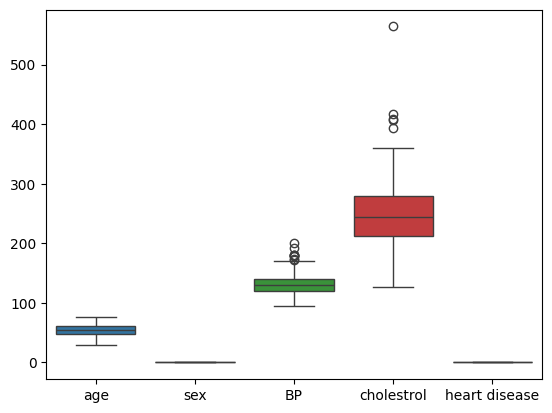

In [12]:
sns.boxplot(df)


In [13]:
df.isnull().sum()

,0
age,0
sex,0
BP,0
cholestrol,0
heart disease,0


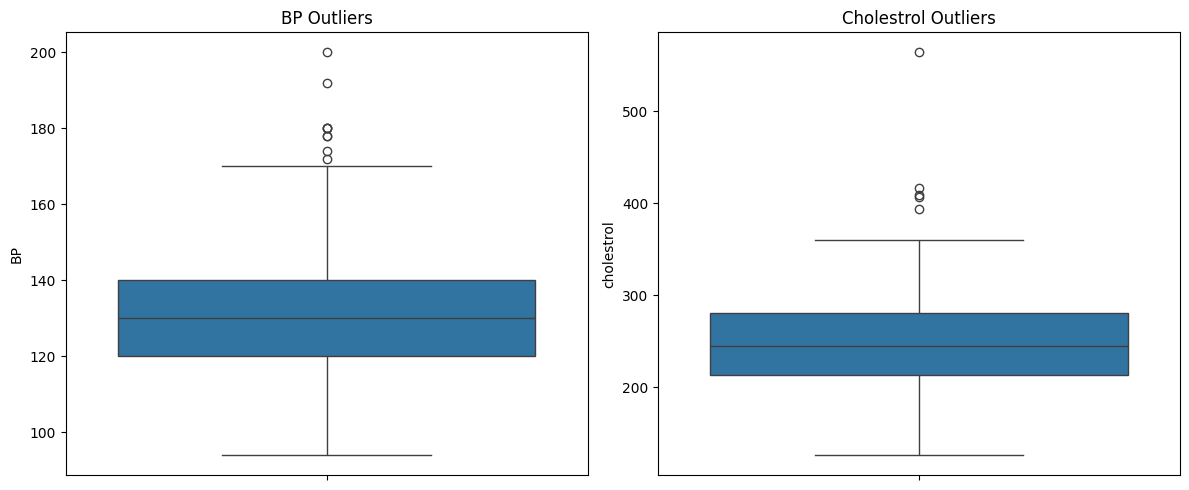

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['BP'])
plt.title("BP Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['cholestrol'])
plt.title("Cholestrol Outliers")

plt.tight_layout()
plt.show()

In [15]:
# Function to treat outliers using IQR method
def treat_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    data[column] = data[column].apply(
        lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x
    )
    return data

# Treat outliers in 'BP' and 'cholestrol'
df = treat_outliers_IQR(df, 'BP')
df = treat_outliers_IQR(df, 'cholestrol')

# Features and target
X = df.drop('heart disease', axis=1)
y = df['heart disease']

from sklearn.preprocessing import RobustScaler
# Scale features using RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


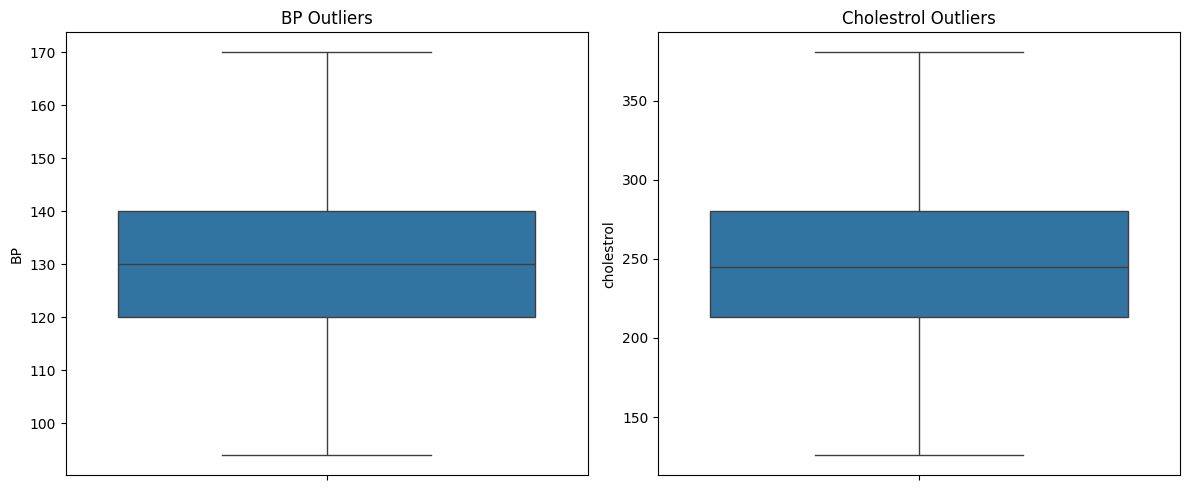

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['BP'])
plt.title("BP Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['cholestrol'])
plt.title("Cholestrol Outliers")

plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
acc_dt = round(accuracy_score(y_test, y_pred_dt) * 100, 2)
print("Accuracy of Decision Tree model:", acc_dt)

Accuracy of Decision Tree model: 70.37


In [20]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
print("Accuracy of Decision Tree model:", acc_rf)

Accuracy of Decision Tree model: 66.67


In [21]:
# Evaluation function
def evaluate(y_true, y_pred, model_name):
    print(f"\n🔍 {model_name} Evaluation:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred) * 100, 2), "%")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate both models
evaluate(y_test, y_pred_dt, "Decision Tree")
evaluate(y_test, y_pred_rf, "Random Forest")


🔍 Decision Tree Evaluation:
Accuracy: 70.37 %
Confusion Matrix:
 [[26  7]
 [ 9 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76        33
           1       0.63      0.57      0.60        21

    accuracy                           0.70        54
   macro avg       0.69      0.68      0.68        54
weighted avg       0.70      0.70      0.70        54


🔍 Random Forest Evaluation:
Accuracy: 66.67 %
Confusion Matrix:
 [[25  8]
 [10 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74        33
           1       0.58      0.52      0.55        21

    accuracy                           0.67        54
   macro avg       0.65      0.64      0.64        54
weighted avg       0.66      0.67      0.66        54

